Section 1: Setup & Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('International_Education_Costs.csv')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (907, 12)


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


Section 2: Basic Info

In [3]:
print("Dataset Info:")
df.info()

print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB

First few rows:


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


Section 3: Data Profiling

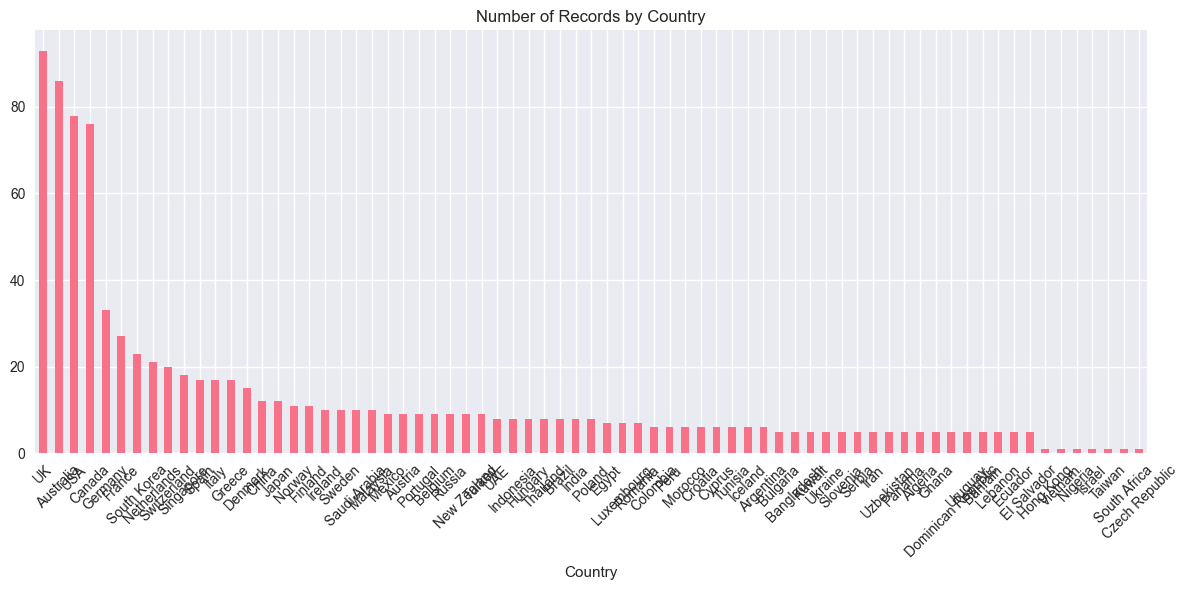


Top 10 Countries:
Country
UK             93
Australia      86
USA            78
Canada         76
Germany        33
France         27
South Korea    23
Netherlands    21
Switzerland    20
Singapore      18
Name: count, dtype: int64


In [4]:
# Distribution by Country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Records by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 10 Countries:")
print(df['Country'].value_counts().head(10))

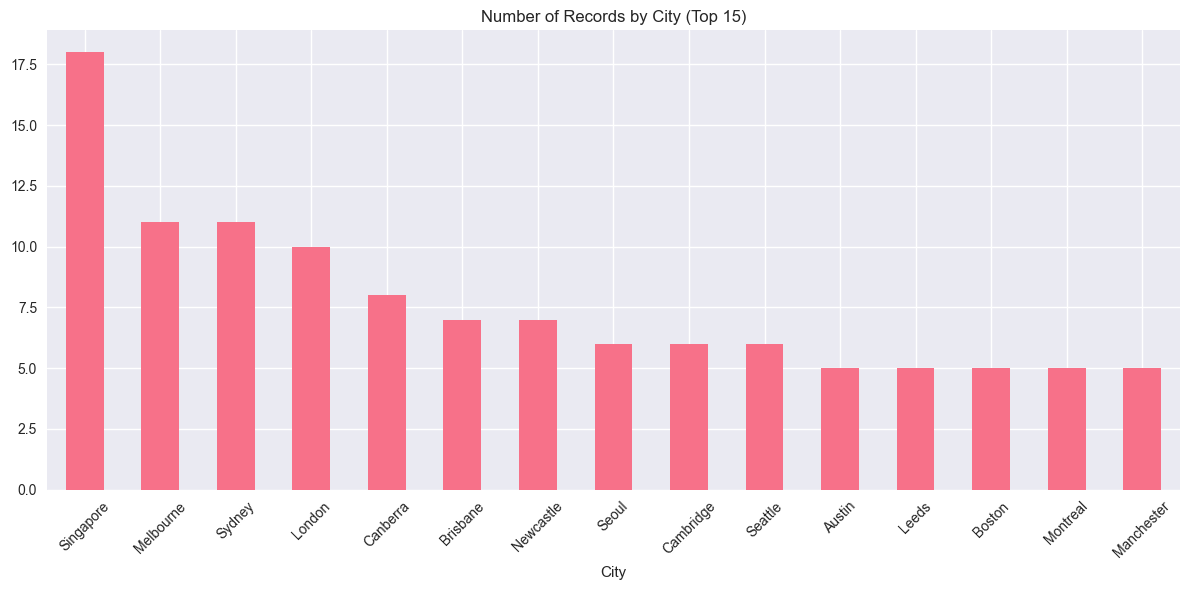

In [5]:
# Distribution by City (top 15)
plt.figure(figsize=(12, 6))
df['City'].value_counts().head(15).plot(kind='bar')
plt.title('Number of Records by City (Top 15)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

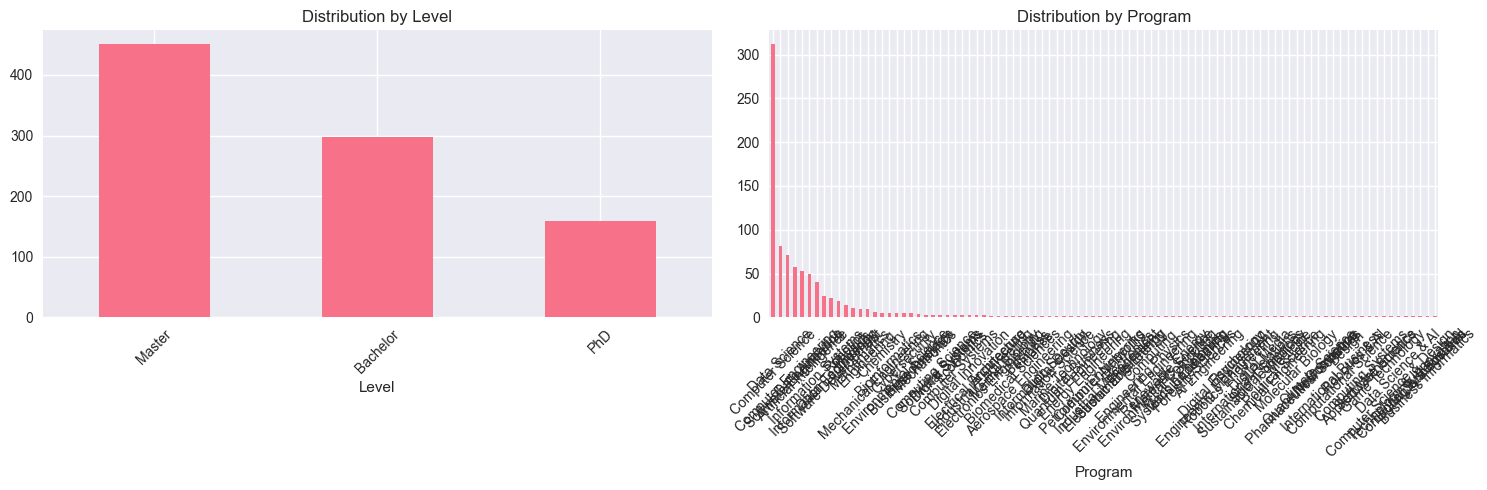

In [6]:
# Distribution by Level and Program
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['Level'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution by Level')
axes[0].tick_params(axis='x', rotation=45)

df['Program'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution by Program')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Section 4: Correlation Analysis

In [7]:
# Check which cost columns are available
print("Available columns:")
print(df.columns.tolist())

# Identify cost-related columns
cost_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in ['tuition', 'rent', 'cost', 'rate', 'insurance', 'visa'])]
print(f"\nCost-related columns: {cost_cols}")

Available columns:
['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']

Cost-related columns: ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']


Numeric columns: ['Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']


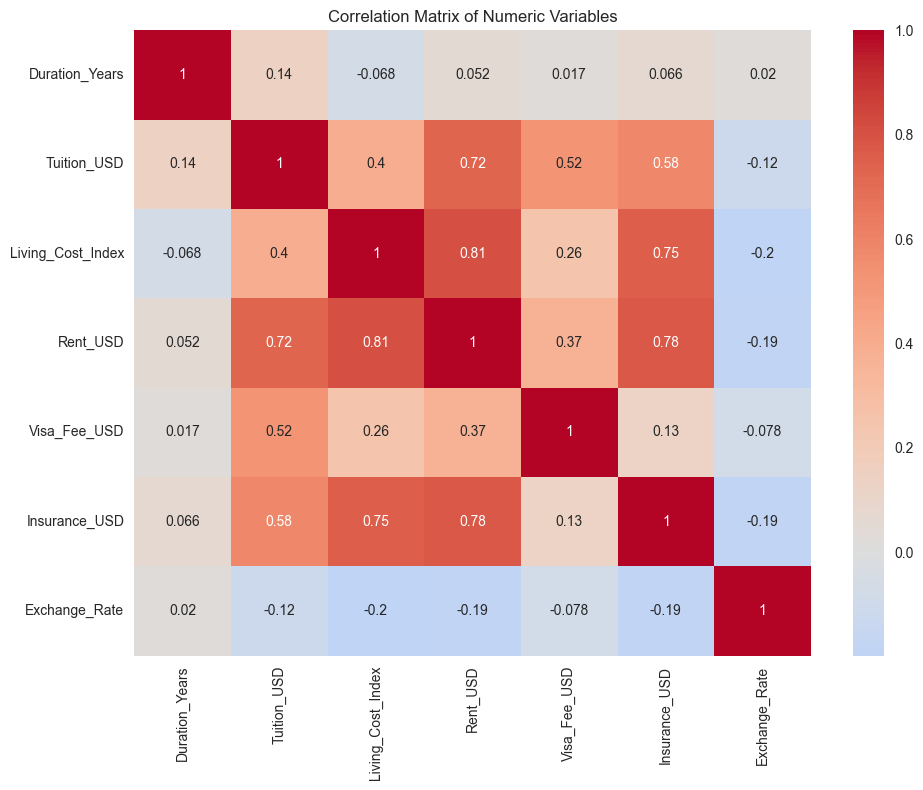

In [8]:
# Correlation heatmap for numeric cost columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")

if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()

Section 5: TCA Calculation

In [9]:
# Check what cost columns are available for TCA calculation
print("Available columns for TCA calculation:")
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['tuition', 'rent', 'visa', 'insurance', 'cost']):
        print(f"- {col}: {df[col].dtype}")
        print(f"  Sample values: {df[col].dropna().head(3).tolist()}")

Available columns for TCA calculation:
- Tuition_USD: int64
  Sample values: [55400, 41200, 38500]
- Living_Cost_Index: float64
  Sample values: [83.5, 75.8, 72.5]
- Rent_USD: int64
  Sample values: [2200, 1800, 1600]
- Visa_Fee_USD: int64
  Sample values: [160, 485, 235]
- Insurance_USD: int64
  Sample values: [1500, 800, 900]


In [11]:
# Calculate TCA based on available columns
# Adjust this calculation based on your actual column names
try:
    # Example calculation - modify based on actual columns
    df['TCA'] = df['Tuition_USD'] + df['Rent_USD'] * 12 + df['Visa_Fee_USD'] + df['Insurance_USD'] * 1
    print("TCA calculated successfully!")
    print(f"TCA statistics:\n{df['TCA'].describe()}")
except KeyError as e:
    print(f"Column not found: {e}")
    print("Please adjust column names in the TCA calculation above")

TCA calculated successfully!
TCA statistics:
count      907.000000
mean     29246.964719
std      21798.025789
min       3100.000000
25%      11475.000000
50%      18590.000000
75%      46495.000000
max      93660.000000
Name: TCA, dtype: float64


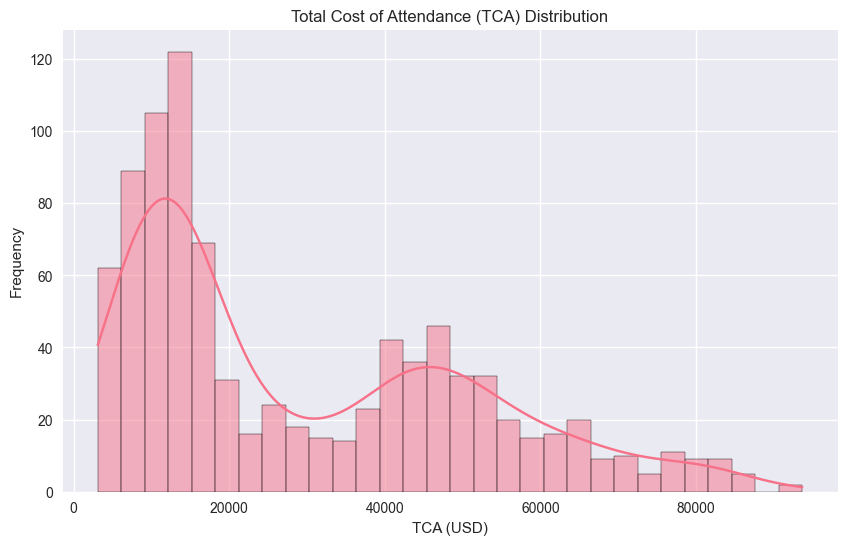

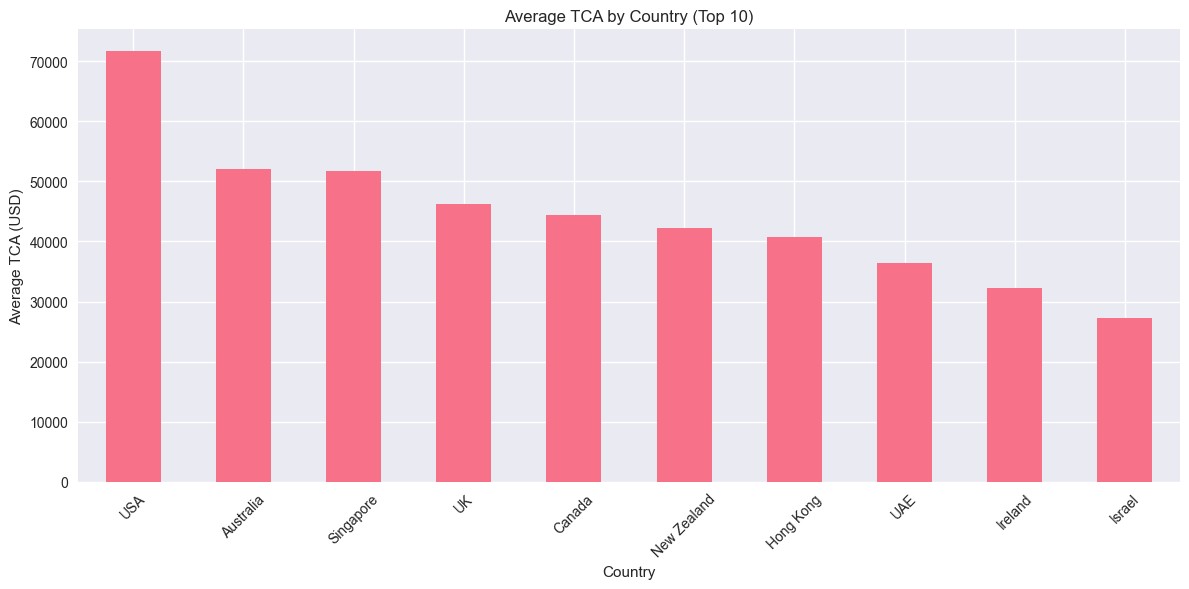

In [12]:
# Visualize TCA distribution if calculated
if 'TCA' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['TCA'], bins=30, kde=True)
    plt.title('Total Cost of Attendance (TCA) Distribution')
    plt.xlabel('TCA (USD)')
    plt.ylabel('Frequency')
    plt.show()
    
    # TCA by country (top 10)
    plt.figure(figsize=(12, 6))
    tca_by_country = df.groupby('Country')['TCA'].mean().sort_values(ascending=False).head(10)
    tca_by_country.plot(kind='bar')
    plt.title('Average TCA by Country (Top 10)')
    plt.xticks(rotation=45)
    plt.ylabel('Average TCA (USD)')
    plt.tight_layout()
    plt.show()

Section 6: Outlier Detection & Currency Stability

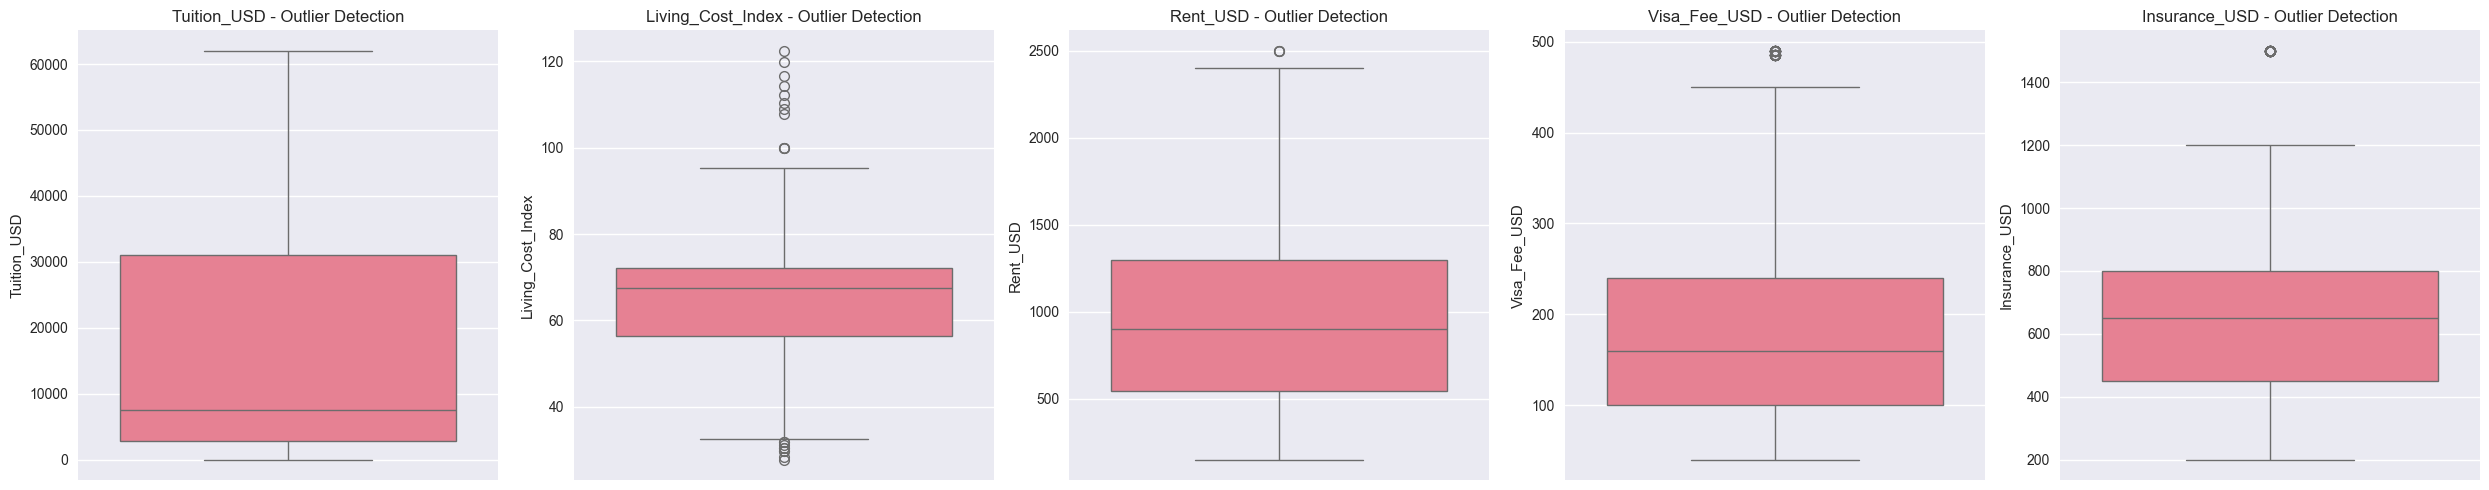

In [13]:
# Boxplots for outlier detection in cost columns
numeric_cost_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                     if any(keyword in col.lower() for keyword in ['tuition', 'rent', 'visa', 'insurance', 'cost'])]

if numeric_cost_cols:
    fig, axes = plt.subplots(1, len(numeric_cost_cols), figsize=(5*len(numeric_cost_cols), 5))
    if len(numeric_cost_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(numeric_cost_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'{col} - Outlier Detection')
    
    plt.tight_layout()
    plt.show()

In [14]:
# Check for currency/exchange rate stability
exchange_rate_cols = [col for col in df.columns if 'exchange' in col.lower() or 'rate' in col.lower()]
if exchange_rate_cols:
    print(f"Exchange rate columns: {exchange_rate_cols}")
    for col in exchange_rate_cols:
        print(f"\n{col} statistics:")
        print(df[col].describe())
        
        # Check for countries with multiple exchange rates
        if 'Country' in df.columns:
            country_rates = df.groupby('Country')[col].agg(['mean', 'std', 'count'])
            print(f"\n{col} by Country (countries with multiple records):")
            print(country_rates[country_rates['count'] > 1])

Exchange rate columns: ['Exchange_Rate']

Exchange_Rate statistics:
count      907.000000
mean       623.000695
std       3801.746134
min          0.150000
25%          0.920000
50%          1.350000
75%          7.150000
max      42150.000000
Name: Exchange_Rate, dtype: float64

Exchange_Rate by Country (countries with multiple records):
                    mean         std  count
Country                                    
Algeria       137.500000    0.000000      5
Argentina     366.083333  223.107691      6
Australia       1.520000    0.000000     86
Austria         0.920000    0.000000      9
Bahrain         0.380000    0.000000      5
...                  ...         ...    ...
UK              0.790000    0.000000     93
USA             1.000000    0.000000     78
Ukraine        36.800000    0.000000      5
Uruguay        39.500000    0.000000      5
Uzbekistan  12300.000000    0.000000      5

[64 rows x 3 columns]


Section 7: Summary

In [15]:
print("=== EDA SUMMARY ===\n")

print(f"Total records: {len(df)}")
print(f"Number of countries: {df['Country'].nunique()}")
print(f"Number of cities: {df['City'].nunique()}")
print(f"Number of programs: {df['Program'].nunique()}")
print(f"Education levels: {df['Level'].unique()}")

if 'TCA' in df.columns:
    print(f"\nTCA Statistics:")
    print(f"Mean TCA: ${df['TCA'].mean():,.2f}")
    print(f"Median TCA: ${df['TCA'].median():,.2f}")
    print(f"Min TCA: ${df['TCA'].min():,.2f}")
    print(f"Max TCA: ${df['TCA'].max():,.2f}")

=== EDA SUMMARY ===

Total records: 907
Number of countries: 71
Number of cities: 556
Number of programs: 92
Education levels: ['Master' 'Bachelor' 'PhD']

TCA Statistics:
Mean TCA: $29,246.96
Median TCA: $18,590.00
Min TCA: $3,100.00
Max TCA: $93,660.00
